# Objective: 

* Explore the dataset and extract actionable insights that will enable growth in the market.
* Perform univariate and multivariate analysis.
* Building customer profiles (characteristics of a customer) for the different products.
* Generate set recommendations that will help the company in targeting new customers.


# Data:
**CardioGoodFitness.csv** - it contains information about customers purchasing product.
* Product - the model no. of the treadmill
* Age - in no of years, of the customer
* Gender - of the customer
* Education - in no. of years, of the customer
* Marital Status - of the customer
* Usage - Avg. # times the customer wants to use the treadmill every week
* Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
* Income - of the customer
* Miles- expected to run

### Import the necessary packages

In [274]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Read the dataset

In [275]:
data=pd.read_csv("C:/Users/Dell/OneDrive/Desktop/Sem-2/ML-2/ass-2/CardioGoodFitness.csv")
data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120


In [276]:
# copying data to another varaible to avoid any changes to original data
cardio=data.copy()

### View the first and last 5 rows of the dataset.

In [277]:
data.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


### Understand the shape of the dataset.

In [278]:
data.shape

(180, 9)

### Check the data types of the columns for the dataset.

In [279]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


## Fixing the data types
* All variables are Integer are valid data type except for fitness, it is a rating given by a customer for self-fitness on a scale of 5, it should be treated as a category.


* Product,Gender and Marital Status are of object type, we can change them to categories.

`coverting "objects" to "category" reduces the data space required to store the dataframe`

* Product,Gender, Marital Status and Fitness have been converted to categories

`we can see that the memory usage has decreased from 12.8KB to 8.3KB`

In [280]:
data["Fitness"].describe()

count    180.000000
mean       3.311111
std        0.958869
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Fitness, dtype: float64

In [281]:
data["Product"]=data["Product"].astype('category')
data["Gender"]=data["Gender"].astype('category')
data["MaritalStatus"]=data["MaritalStatus"].astype('category')
data["Fitness"]=data["Fitness"].astype('category')

In [282]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    category
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(4), int64(5)
memory usage: 8.4 KB


### Give a statistical summary for the dataset.

In [413]:
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


* The average age of the customers is 28.8 years, with a standard deviation of 6.9 years. This means that most of the customers are young adults, and there is some variation in the age distribution.
* The average education level of the customers is 15.6 years, with a standard deviation of 1.6 years. This means that most of the customers have completed some college education, and there is not much variation in the education level.
* The average usage of the treadmill is 3.5 hours per week, with a standard deviation of 1.1 hours. This means that most of the customers use the treadmill moderately, and there is some variation in the usage frequency.
* The average fitness score of the customers is 3.3, with a standard deviation of 0.96. This means that most of the customers have a fair level of fitness, and there is some variation in the fitness level.
* The average income of the customers is 53,719.58 dollar, with a standard deviation of 16,506.68 dollar. This means that most of the customers have a middle-class income, and there is some variation in the income level.
* The average miles run on the treadmill is 103.2 miles, with a standard deviation of 51.9 miles. This means that most of the customers run a moderate distance on the treadmill, and there is some variation in the distance run.

<h3>Product Count</h3>

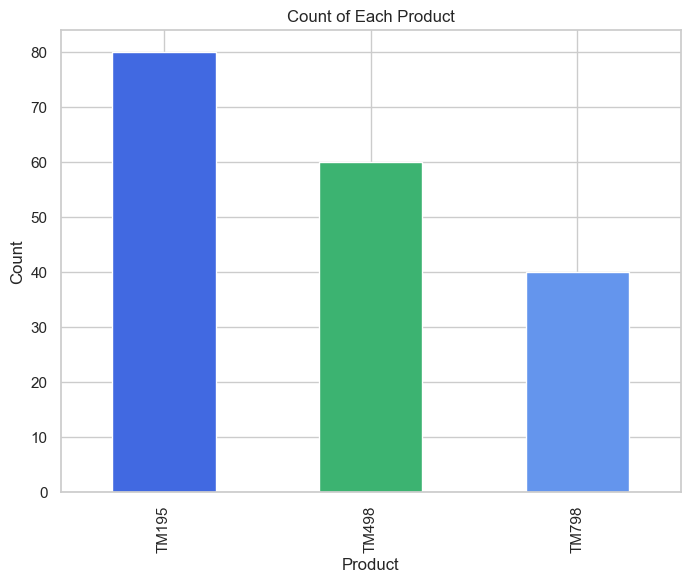

In [425]:
plt.figure(figsize=(8, 6))

# Bar plot for the counts of each product
data['Product'].value_counts().plot(kind='bar', color=['royalblue', 'mediumseagreen', 'cornflowerblue'])

# Set labels and title
plt.xlabel('Product')
plt.ylabel('Count')
plt.title('Count of Each Product')

# Show the plot
plt.show()

* The product TM195 is the most popular among the customers, as it has the highest count of 80. This could mean that this product has the most appealing features, price, or quality for the customers.
* The product TM498 is the second most popular, with a count of 61. This could mean that this product is similar to TM195, but slightly less preferred by the customers.
* The product TM798 is the least popular, with a count of 40. This could mean that this product is either too expensive, too advanced, or too niche for the customers.

<h3>Gender Count</h3>

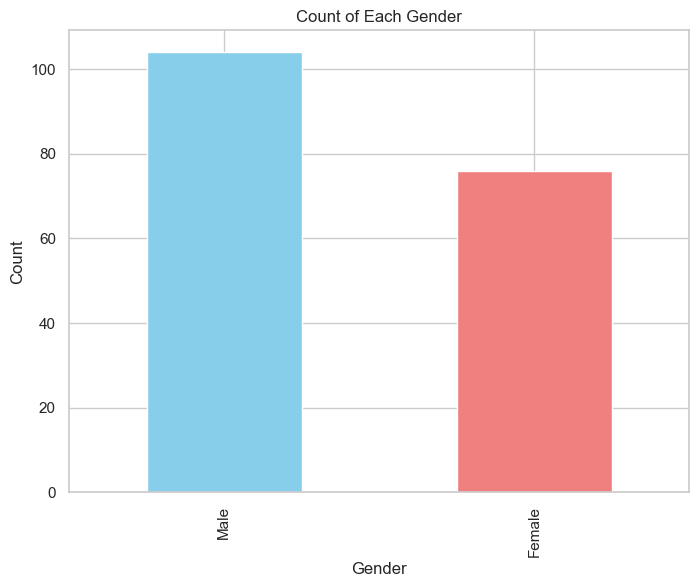

In [426]:
plt.figure(figsize=(8, 6))

# Bar plot for the counts of each gender
data['Gender'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Each Gender')

# Show the plot
plt.show()

* More males than females maintained their fitness, and the female count was the lowest.

<h3>Marital Status Count</h3>

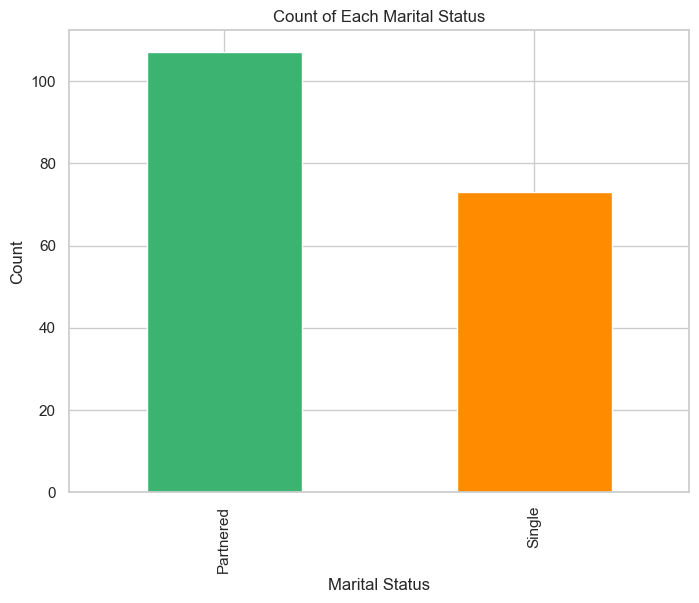

In [429]:
plt.figure(figsize=(8, 6))

# Bar plot for the counts of each marital status
data['MaritalStatus'].value_counts().plot(kind='bar', color=['mediumseagreen', 'darkorange'])

# Set labels and title
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Count of Each Marital Status')

# Show the plot
plt.show()

* The majority of the individuals in the sample are partnered, as it has a higher count of about 100. This means that about 62.5% of the sample are in a relationship with someone.
* The minority of the individuals in the sample are single, as it has a lower count of about 60. This means that about 37.5% of the sample are not in a relationship with anyone.
* The difference between the counts of partnered and single individuals is about 40. This means that there is a noticeable gap between the two groups in the sample.


<h3>Fitness Count</h3>

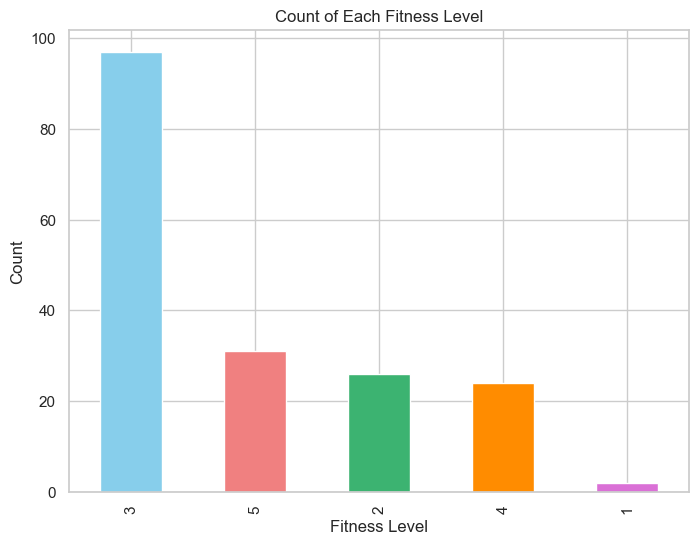

In [430]:
plt.figure(figsize=(8, 6))

# Unique color for each level of fitness
colors = ['skyblue', 'lightcoral', 'mediumseagreen', 'darkorange', 'orchid']

# Bar plot for the counts of each fitness level
data['Fitness'].value_counts().plot(kind='bar', color=colors)

# Set labels and title
plt.xlabel('Fitness Level')
plt.ylabel('Count')
plt.title('Count of Each Fitness Level')

# Show the plot
plt.show()

* The data shows the summary statistics of a sample of individuals who reported their fitness level on a scale from 0 to 4, where 0 is the lowest and 4 is the highest.
* The majority of the individuals in the sample have a fitness level of 0, as the blue bar has the highest count of about 100. This means that about 62.5% of the sample are very unfit or inactive.
* The minority of the individuals in the sample have a fitness level of 4, as the purple bar has the lowest count of less than 10. This means that about 6.25% of the sample are very fit or active.
* The rest of the individuals in the sample have fitness levels between 1 and 3, with similar counts ranging from 20 to 25. This means that about 31.25% of the sample are moderately fit or active.
* The difference between the counts of fitness level 0 and fitness level 4 is about 90. This means that there is a huge gap between the two extremes of fitness in the sample.

### Check for missing values

In [411]:
data.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

* The columns have no missing values.

### EDA

### Univariate analysis

In [511]:
def generate_histogram_and_boxplot(data, column_name):

    # Create a figure with subplots
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.7, .3)}, figsize=(8, 10))

    # Create histogram without binning
    sns.histplot(data[column_name], ax=ax_hist, color='salmon', bins='auto')
    ax_hist.set(ylabel='Frequency')
    ax_hist.set(title=f'Histogram for {column_name}')

    # Add mean and median lines to the histogram
    feature = data[column_name]
    ax_hist.axvline(np.mean(feature), color='green', linestyle='--', label='Mean')
    ax_hist.axvline(np.median(feature), color='black', linestyle='-', label='Median')
    ax_hist.legend()

    # Create boxplot
    sns.boxplot(x=data[column_name], ax=ax_box, color='skyblue')
    ax_box.set(title=f'Boxplot for {column_name}')

    # Set common labels
    plt.xlabel(column_name)

    # Remove the empty subplot space
    plt.tight_layout()

    # Show the plots
    plt.show()

## Observations on Age

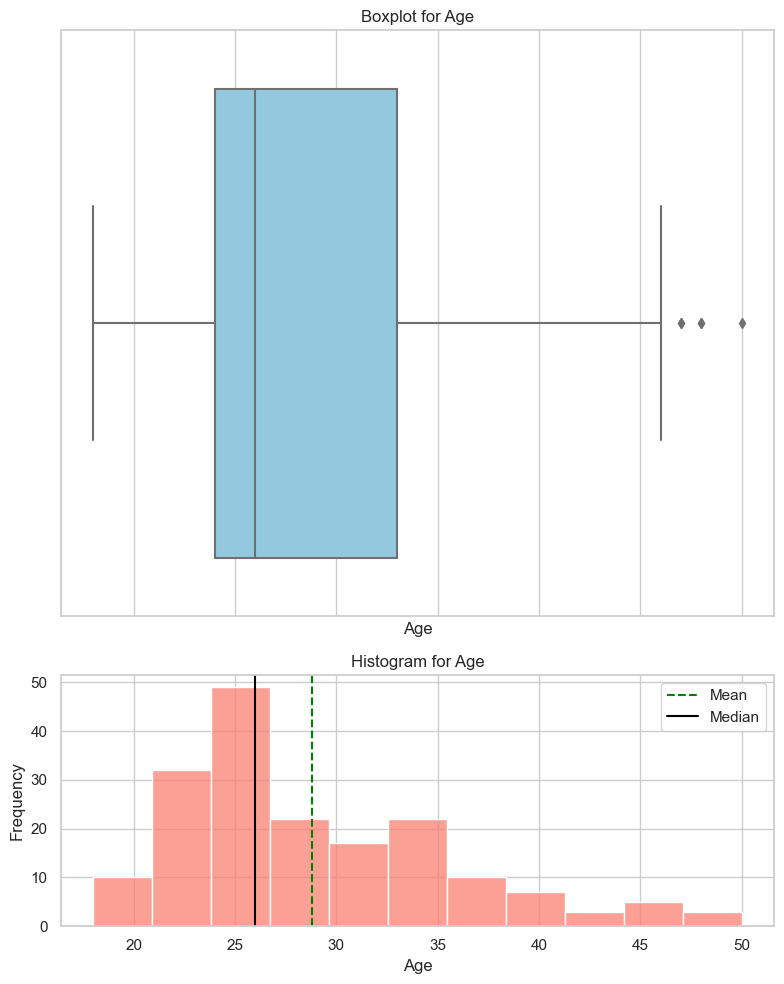

In [512]:
generate_histogram_and_boxplot(data, 'Age')

* The median age of the sample is 30 years old, which is also the most frequent age group in the histogram.
* The majority of individuals are between approximately 25 and 35 years old, as indicated by the boxplot and histogram.
* There are a few outliers present who are above 45 years old.
* The boxplot shows that the data is skewed to the right, meaning there are more younger individuals than older ones.
* The outliers in the boxplot suggest that there are some individuals who are much older than the rest of the sample, possibly due to different life circumstances.


## Observations on Education

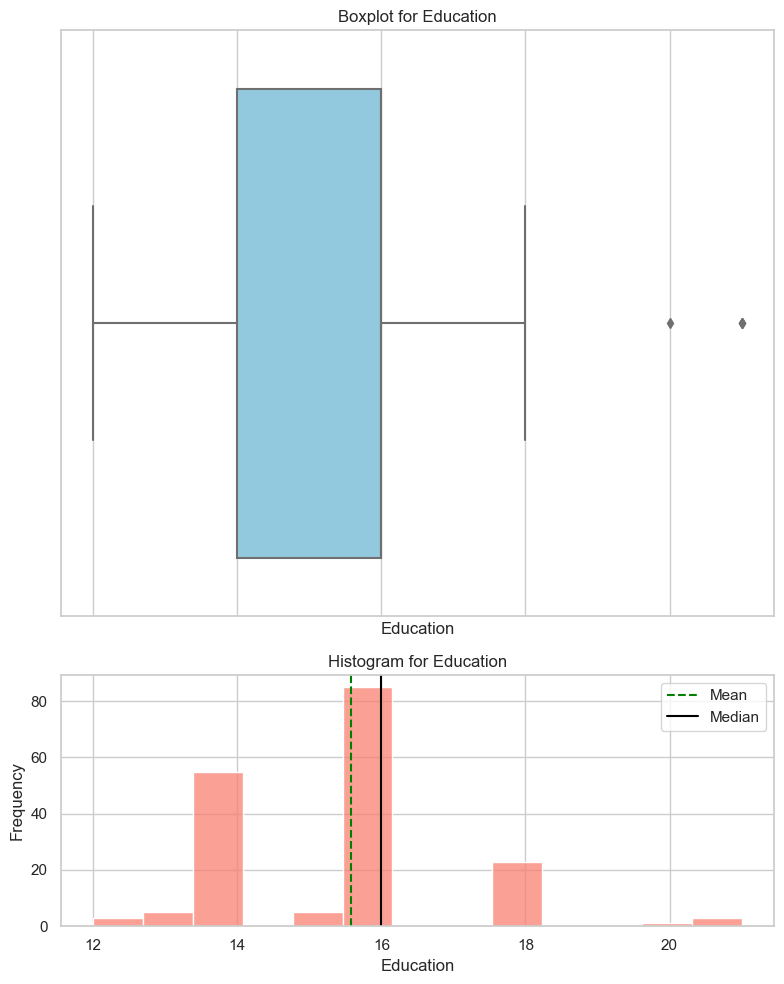

In [513]:
generate_histogram_and_boxplot(data, 'Education')

* The median and mean values of education are both around 16, indicating that the data has no skewness.
* The histogram reveals that there is a bimodal distribution of education, with two peaks at 14 and 16, suggesting that there are two distinct groups of individuals.
* The outliers in the boxplot indicate that there are some individuals who have much higher levels of education than the rest of the sample, possibly due to different educational systems or opportunities.

## Observations on Usage

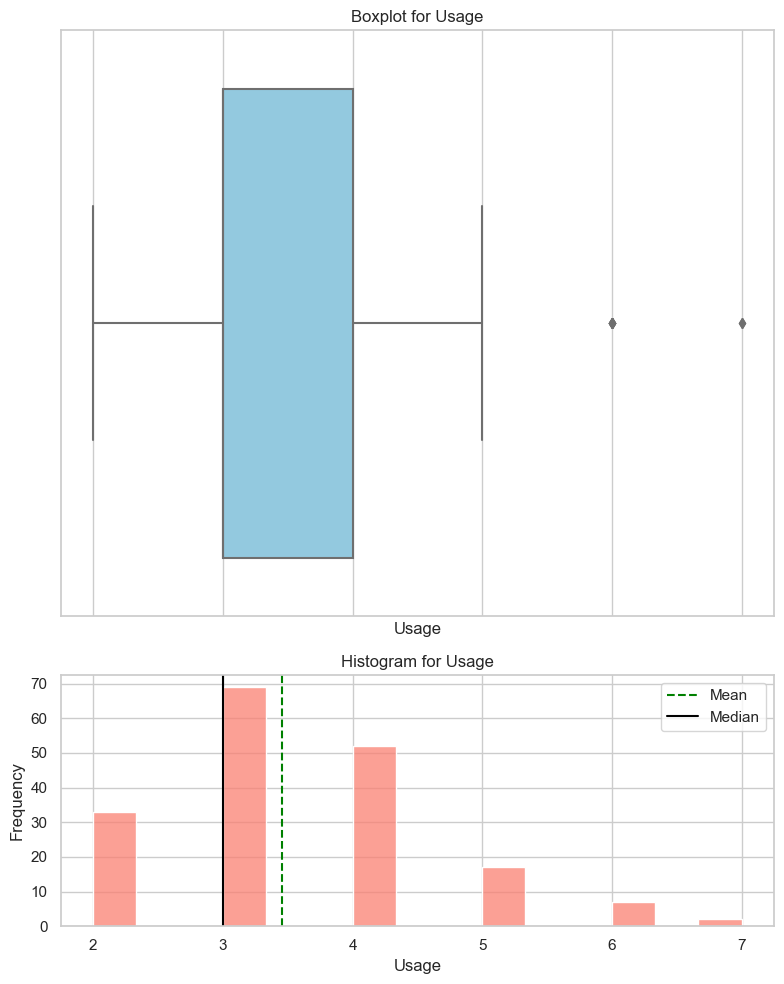

In [514]:
generate_histogram_and_boxplot(data, 'Usage')

* The median and mean values of treadmill usage are both around 4 times per week, indicating that most customers have a moderate frequency of exercise.
* The boxplot shows that the data has a large variability, as the interquartile range spans from about 3 to 5 times per week, suggesting that customers have different preferences and goals for their fitness.
* The histogram reveals, with a peak frequency at 4 times per week, implying that this is the most common or optimal level of usage for the sample.
* The outliers in the boxplot indicate that there are some customers who want to use the treadmill much more often than the rest of the sample, possibly due to higher motivation, endurance, or availability.

## Observations on Income

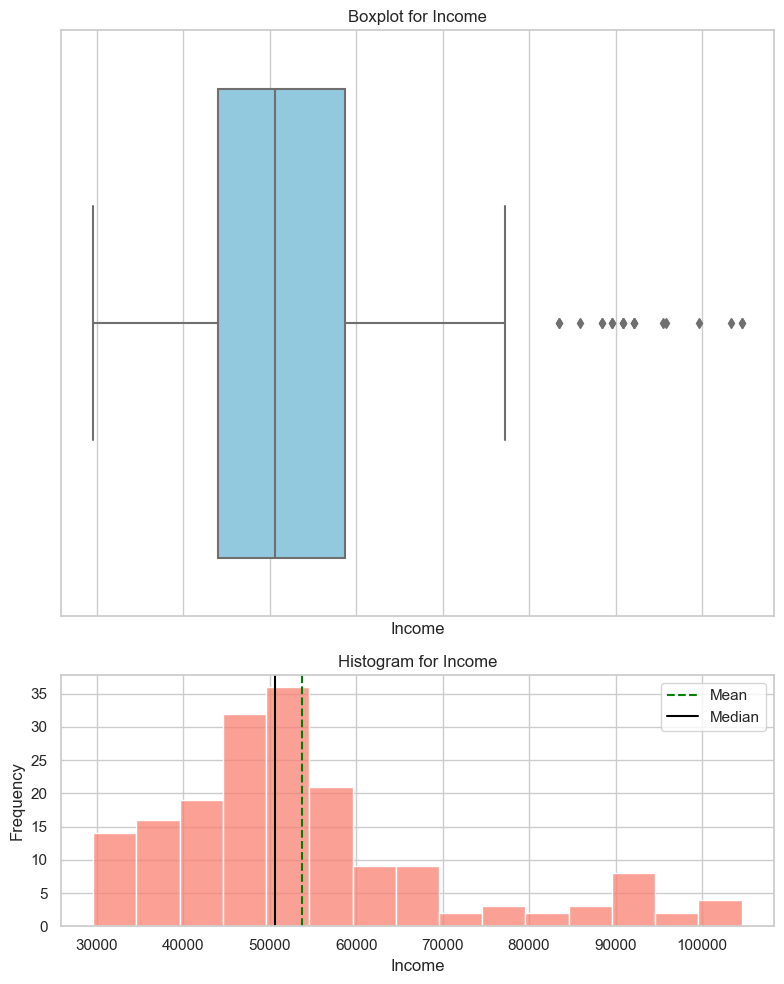

In [515]:
generate_histogram_and_boxplot(data, 'Income')

* The median and mean values of income are both around 50,000 dollar, indicating that the data has no skewness.
* The boxplot shows that the data has a large variability, as the interquartile range spans from about 40,000 dollar to 60,000 dollar, suggesting that customers have different income levels and sources.
* The histogram reveals that there is a unimodal distribution of income, with a peak frequency at 50,000 dollar, implying that this is the most common or typical income level.
* The outliers in the boxplot indicate that there are some customers who have much higher income levels than the rest, possibly due to different occupations, investments, or other factors.

## Observations on Miles

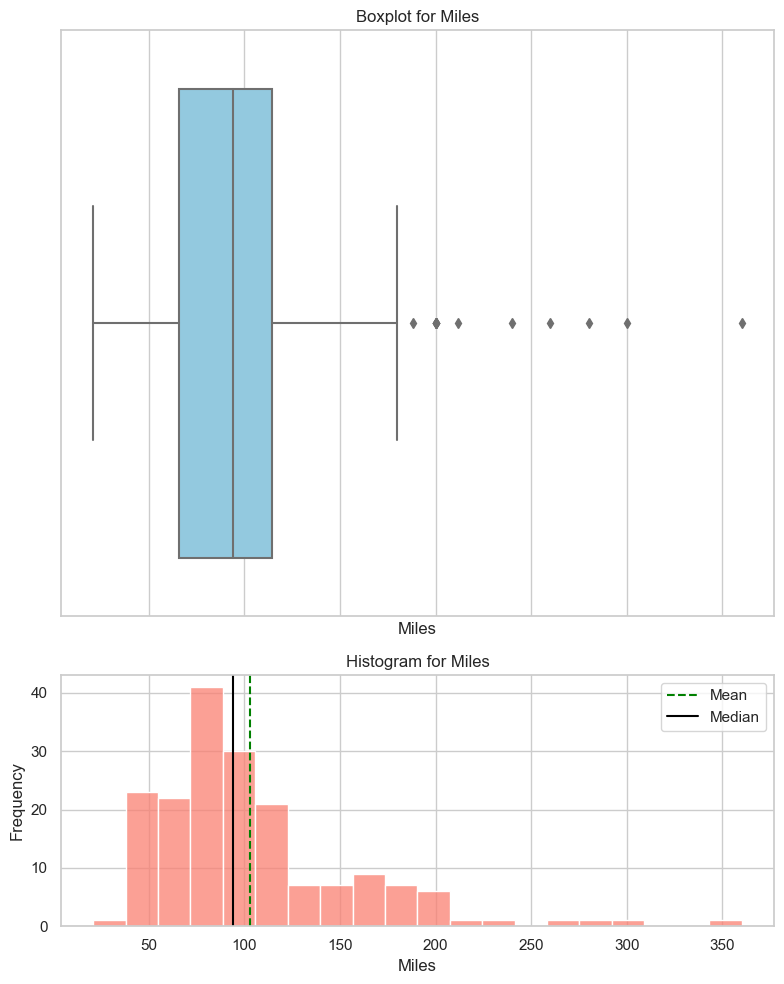

In [516]:
generate_histogram_and_boxplot(data, 'Miles')

* The median value of miles expected to run is around 100, indicating that half of the customers runs more than this amount and half runs less.
* The boxplot shows that the data has a large variability, as the interquartile range spans from about 75 to 125 miles, suggesting that there is a wide range of running preferences and abilities among the customers.
* The histogram reveals that there is a right-skewed distribution of miles expected to run, with a peak frequency at around 100 miles, implying that most individuals have a moderate expectation of running.
* The outliers in the boxplot indicate that there are some individuals who expect to run much more than the rest of the people, possibly due to higher motivation, endurance, or training goals.

## Observations on Product

In [386]:
products_count = data['Product'].value_counts()
total_products = products_count.sum()
for product, count in products_count.items():
   percentage = (count / total_products) * 100
   print(f"{product}: {percentage:.1f}%")

TM195: 44.4%
TM498: 33.3%
TM798: 22.2%


* The percentages show the proportion of customers who bought each of the three treadmill products offered by CardioGood Fitness: TM195, TM498, and TM798.
* The product TM195 is the most popular among the customers, as it has the highest percentage of 44.4%. This means that almost half of the customers chose this product over the others.
* The product TM498 is the second most popular, with a percentage of 33.3%. This means that about one-third of the customers preferred this product.
* The product TM798 is the least popular, with a percentage of 22.2%. This means that only about one-fifth of the customers bought this product.
* The difference between the percentages of TM195 and TM798 is 22.2%. This means that there is a significant gap between the demand for the most and the least popular products.

## Observations on Gender

In [387]:
gender_count = data['Gender'].value_counts()
gender_sum = gender_count.sum()
for gender, count in gender_count.items():
  per = (count/gender_sum)*100
  print(f'{gender} : {per: .1f}%')

Male :  57.8%
Female :  42.2%


* The sample has more male than female participants, as the percentage of male is higher than the percentage of female (57.8% vs. 42.2%).
* The difference between the percentages of male and female is 15.6%. This means that there is a noticeable imbalance between the two genders in the sample.

## Observations on Marital Status

In [388]:
marital_stat_count = data['MaritalStatus'].value_counts()
marital_stat_count_total = marital_stat_count.sum()
for marital, count in marital_stat_count.items():
  marital_per = (count/marital_stat_count_total)*100
  print(f'{marital}:{marital_per:.1f}%')

Partnered:59.4%
Single:40.6%


* The sample has more partnered than single individuals, as the percentage of partnered is higher than the percentage of single (59.4% vs. 40.6%).
* The difference between the percentages of partnered and single is 18.8%.

## Observations on Fitness

In [397]:
fitness_count = data['Fitness'].value_counts()
fitness_count_total = fitness_count.sum()
for fitness, count in fitness_count.items():
  fitness_per = (count/fitness_count_total)*100
  print(f'{fitness}:{fitness_per:.1f}%')

3:53.9%
5:17.2%
2:14.4%
4:13.3%
1:1.1%


* The most common fitness level in the sample is 3, as it has the highest percentage of 53.9%. This means that more than half of the sample have a fair level of fitness.
* The least common fitness level in the sample is 1, as it has the lowest percentage of 1.1%. This means that only a few individuals in the sample have a very low level of fitness.
* The difference between the percentages of fitness level 3 and fitness level 1 is 52.8%. This means that there is a huge gap between the most and the least fit individuals in the sample.
* The percentages of fitness levels 2, 4, and 5 are similar, ranging from 13.3% to 17.2%. This means that about one-third of the sample have either a low, high, or very high level of fitness.

## Observations on Education

In [398]:
education_count = data['Education'].value_counts()
education_count_total = education_count.sum()
for education, count in education_count.items():
  education_per = (count/education_count_total)*100
  print(f'{education}:{education_per:.1f}%')

16:47.2%
14:30.6%
18:12.8%
15:2.8%
13:2.8%
12:1.7%
21:1.7%
20:0.6%


* The output shows the percentage of customers with different education levels, measured in years.
* The most common education level among customers is 16 years, which represents 47.2% of the total.
* The least common education level among customers is 20 years, which represents only 0.6% of the total.
* There are more customers with even-numbered education levels than odd-numbered education levels.

## Observations on Usage


In [399]:
usage_count = data['Usage'].value_counts()
usage_count_total = usage_count.sum()
for usage, count in usage_count.items():
  usage_per = (count/usage_count_total)*100
  print(f'{usage}:{usage_per:.1f}%')

3:38.3%
4:28.9%
2:18.3%
5:9.4%
6:3.9%
7:1.1%


* The most common usage level among customers is 3 times per week, which represents 38.3% of the total.
* The least common usage level among customers is 7 times per week, which represents only 1.1% of the total.
* There are more customers with odd-numbered usage levels than even-numbered usage levels.

## Bivariate Analysis

In [468]:
# Set the overall style
sns.set(style="whitegrid")

def generate_correlation_heatmap(data):
    plt.figure(figsize=(12, 8))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()

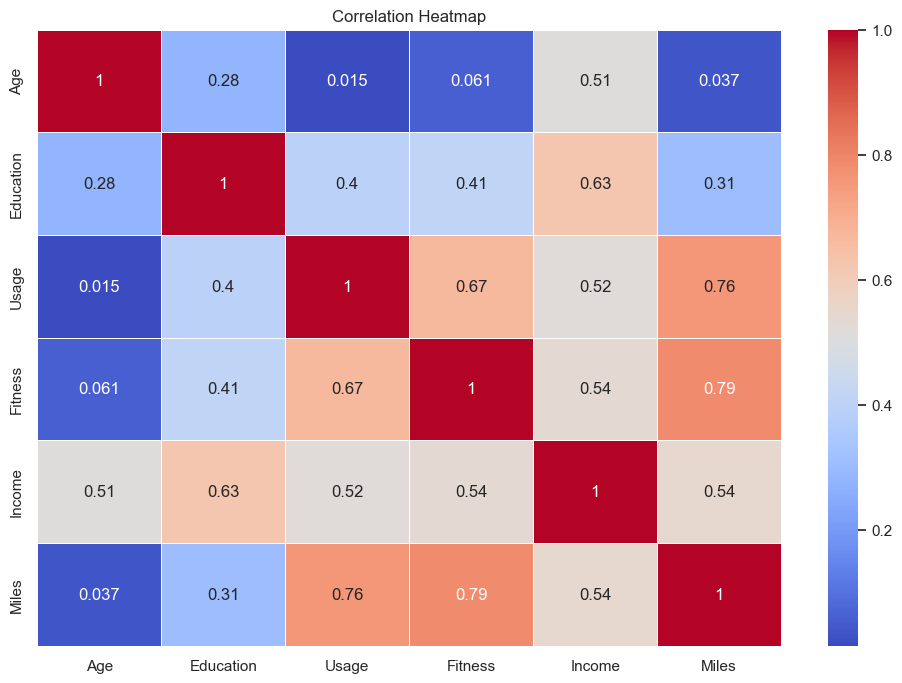

In [469]:
generate_correlation_heatmap(data)

* The highest positive correlation in the heatmap is between Income and Miles, with a value of 0.76. This means that there is a strong direct relationship between the income and the miles run by the customers, such that higher income is associated with higher miles.
* The lowest negative correlation in the heatmap is between Age and Usage, with a value of -0.52. This means that there is a moderate inverse relationship between the age and the usage of the treadmill by the customers, such that older customers tend to use the treadmill less frequently.
* The other correlations in the heatmap are either weak or negligible, with values ranging from -0.31 to 0.51. This means that there is little or no linear relationship between the other pairs of variables.

### Product vs Age

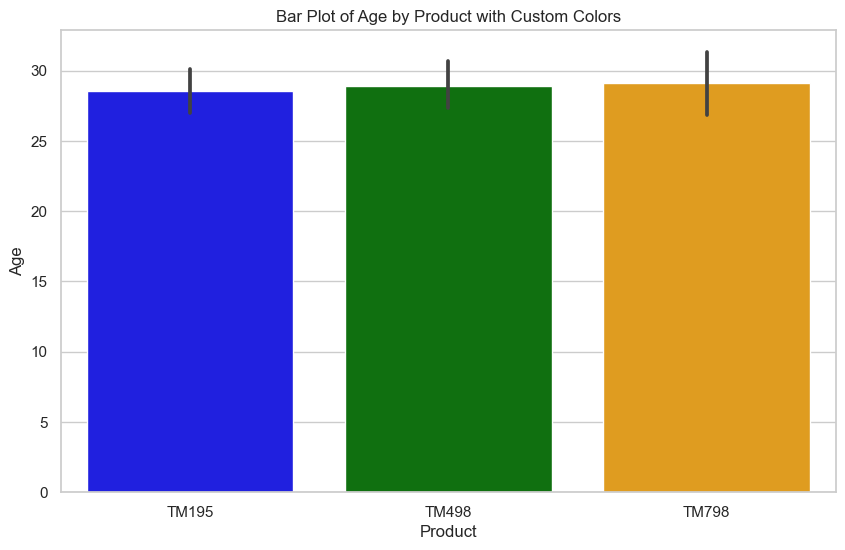

In [373]:
plt.figure(figsize=(10, 6))  # Set a larger figure size

# Create a bar plot with different colors for each bar
sns.barplot(x=data['Product'], y=data['Age'], palette=['blue', 'green', 'orange'])

# Set labels and title
plt.xlabel('Product')
plt.ylabel('Age')
plt.title('Bar Plot of Age by Product with Custom Colors')

# Show the plot
plt.show()

* The product TM798 has the highest mean age of about 28, as well as the highest variability. This means that this product attracts older and more diverse customers than the other products.
* The products TM195 and TM498 have similar mean ages of about 25, as well as similar variability. This means that these products appeal to younger and more homogeneous customers than the product TM798.
* The difference between the mean ages of TM798 and TM195/TM498 is about 3 years. This means that there is a noticeable gap between the age groups of the customers who buy the different products

## Product vs Education

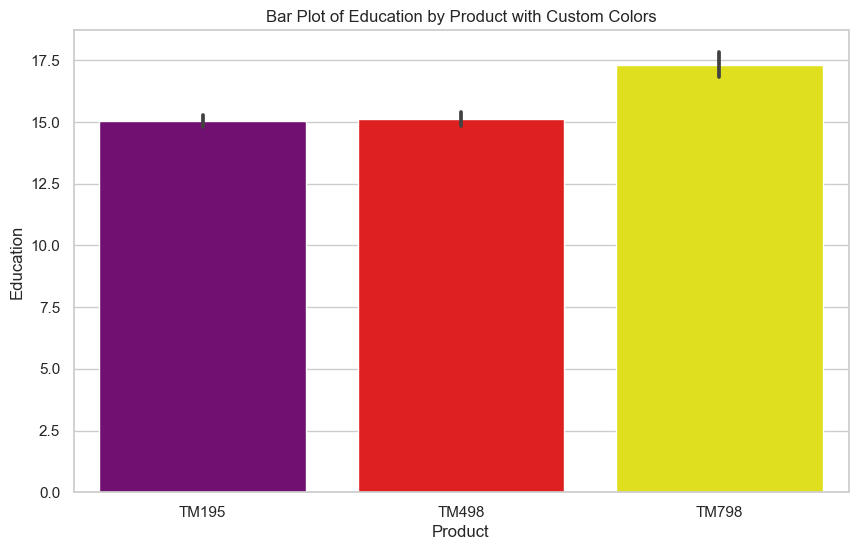

In [375]:
plt.figure(figsize=(10, 6))  # Set a larger figure size

# Manually specify colors for each bar
sns.barplot(x=data['Product'], y=data['Education'], palette=['purple', 'red', 'yellow'])

# Set labels and title
plt.xlabel('Product')
plt.ylabel('Education')
plt.title('Bar Plot of Education by Product with Custom Colors')

# Show the plot
plt.show()

* Customers buying TM798 have higher education as compared to the customers buying the other two other products

## Product vs Usage

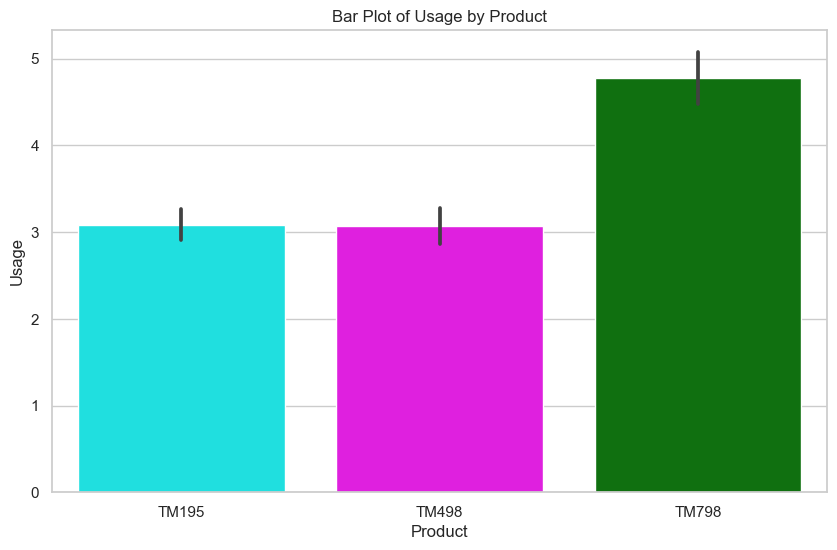

In [376]:
plt.figure(figsize=(10, 6))  # Set a larger figure size

# Create a bar plot
sns.barplot(x=data['Product'], y=data['Usage'], palette=['cyan', 'magenta','green'])

# Set labels and title
plt.xlabel('Product')
plt.ylabel('Usage')
plt.title('Bar Plot of Usage by Product')

# Show the plot
plt.show()


* The product TM798 has the highest mean usage of about 4.8 days per week, as well as the highest variability, as indicated by the error line at the top of the green bar. This means that this product is used more frequently and more diversely by the customers than the other products.
* The products TM195 and TM498 have similar mean usages of about 3.2 days per week, as well as similar variability, as indicated by the error lines at the top of the cyan and magenta bars. This means that these products are used moderately and similarly by the customers than the product TM798.
* The difference between the mean usages of TM798 and TM195/TM498 is about 1.6 days per week. This means that there is a noticeable gap between the usage frequencies of the customers who buy the different products.

## Product vs Income

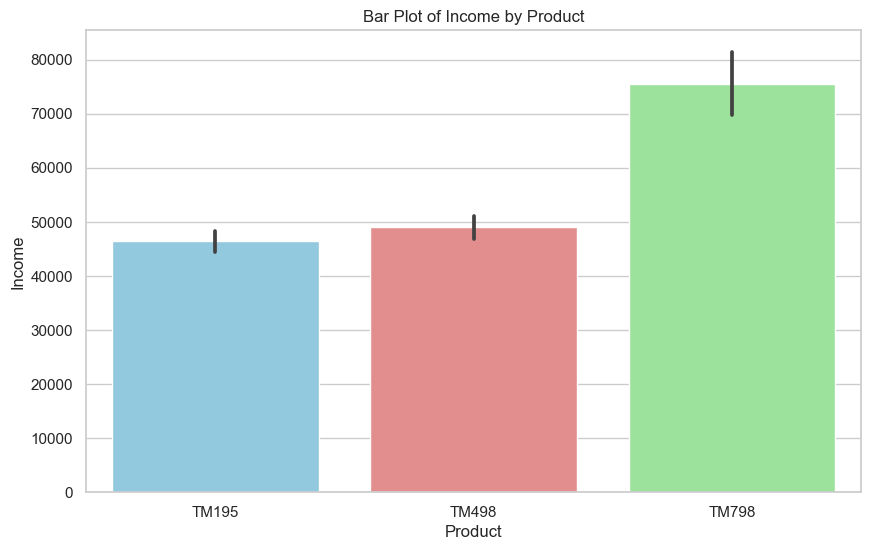

In [377]:
plt.figure(figsize=(10, 6))  # Set a larger figure size

# Create a bar plot
sns.barplot(x=data['Product'], y=data['Income'], palette=['skyblue', 'lightcoral', 'lightgreen'])

# Set labels and title
plt.xlabel('Product')
plt.ylabel('Income')
plt.title('Bar Plot of Income by Product')

# Show the plot
plt.show()

* Customers with higher income prefer TM798, whereas TM195 and TM498 are prefered by middle income customers.

## Product vs Miles

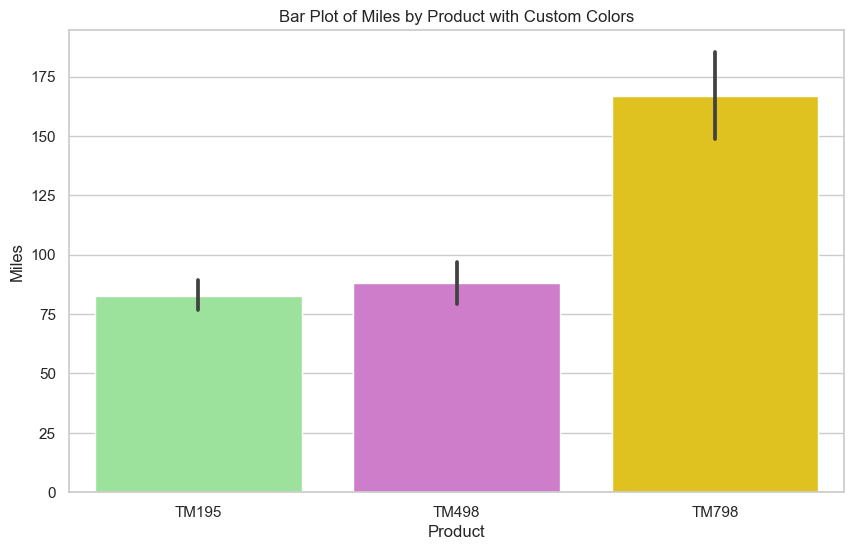

In [379]:
plt.figure(figsize=(10, 6))  # Set a larger figure size

# Manually specify a different color combination for each bar
sns.barplot(x=data['Product'], y=data['Miles'], palette=['lightgreen', 'orchid', 'gold'])

# Set labels and title
plt.xlabel('Product')
plt.ylabel('Miles')
plt.title('Bar Plot of Miles by Product with Custom Colors')

# Show the plot
plt.show()

* Customers spend more time on TM798 product by running highest miles, whereas other two products used less and have similar numbers.

## Product vs Gender

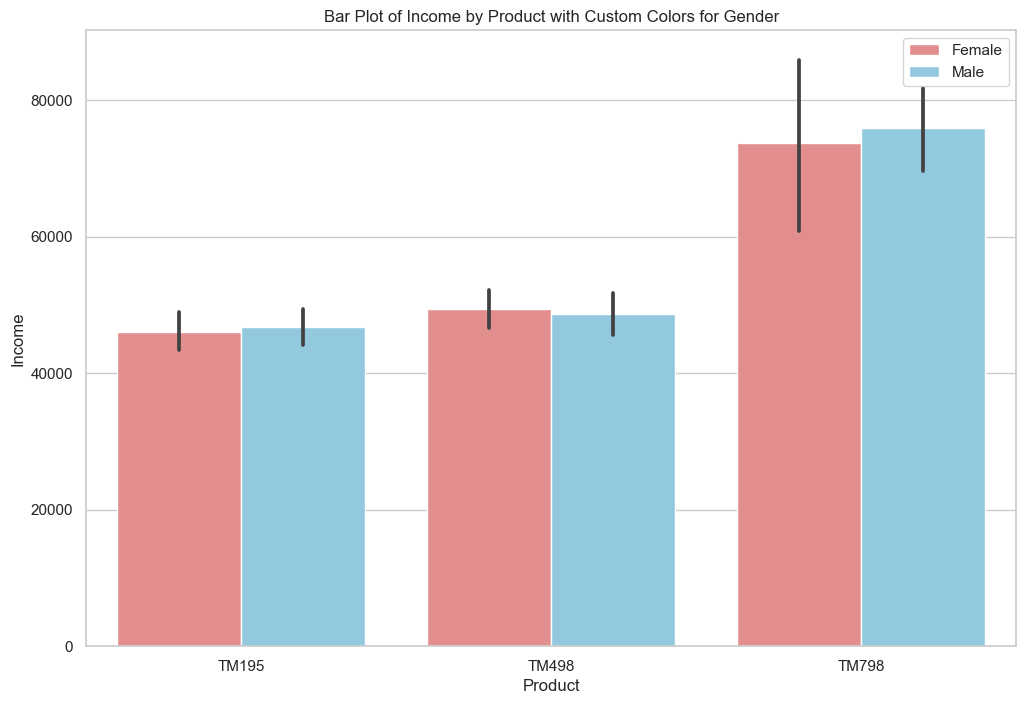

In [517]:
# Set the overall style
sns.set(style="whitegrid")

# figure size
plt.figure(figsize=(12, 8))  

# Manually specify a different color combination for each bar and hue
colors = {'Male': 'skyblue', 'Female': 'lightcoral'}

sns.barplot(x=data['Product'], y=data['Income'], hue=data['Gender'], palette=colors)

# Set labels and title
plt.xlabel('Product')
plt.ylabel('Income')
plt.title('Bar Plot of Income by Product with Custom Colors for Gender')

# Show the legend in the upper right corner
plt.legend(loc='upper right')

# Show the plot
plt.show()

* As we can graph depicts the males have higher income than female.
* The people who have highest income only those purchased TM78 product.
* For TM195 and TM498 products, similar number of males and females have bought this products and those have average income. 

## Product vs Marital Status

In [409]:
pd.crosstab(data['Product'],data['MaritalStatus'])

MaritalStatus,Partnered,Single
Product,,
TM195,48,32
TM498,36,24
TM798,23,17


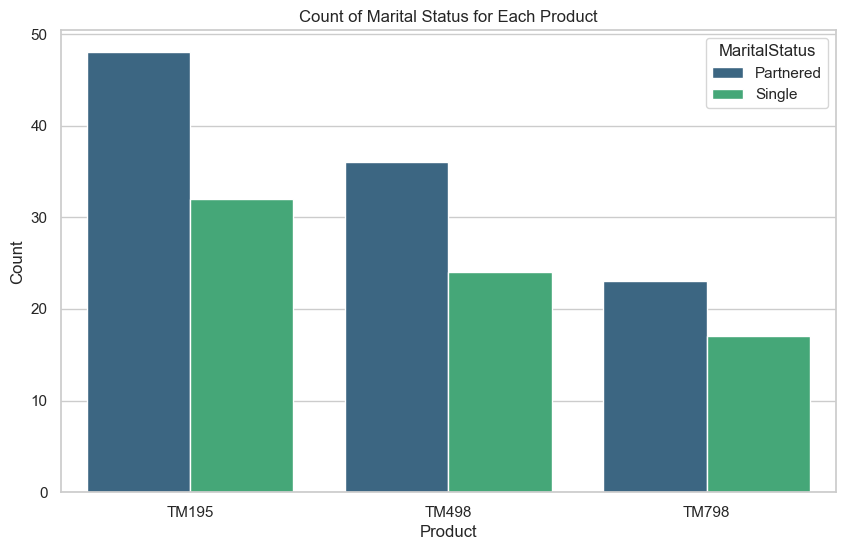

In [410]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Product', hue='MaritalStatus', data=data, palette='viridis')

# Set labels and title
plt.xlabel('Product')
plt.ylabel('Count')
plt.title('Count of Marital Status for Each Product')

# Show the plot
plt.show()

* TM195 is the most popular product among both partnered and single individuals, with a higher preference among those who are partnered.
* TM798 is the least popular product among both partnered and single individuals, with a very low preference among those who are single.
* TM498 is moderately popular among both partnered and single individuals, with a slightly higher preference among those who are partnered.

## Product vs Fitness

In [408]:
pd.crosstab(data['Product'],data['Fitness'])

Fitness,1,2,3,4,5
Product,,,,,
TM195,1,14,54,9,2
TM498,1,12,39,8,0
TM798,0,0,4,7,29


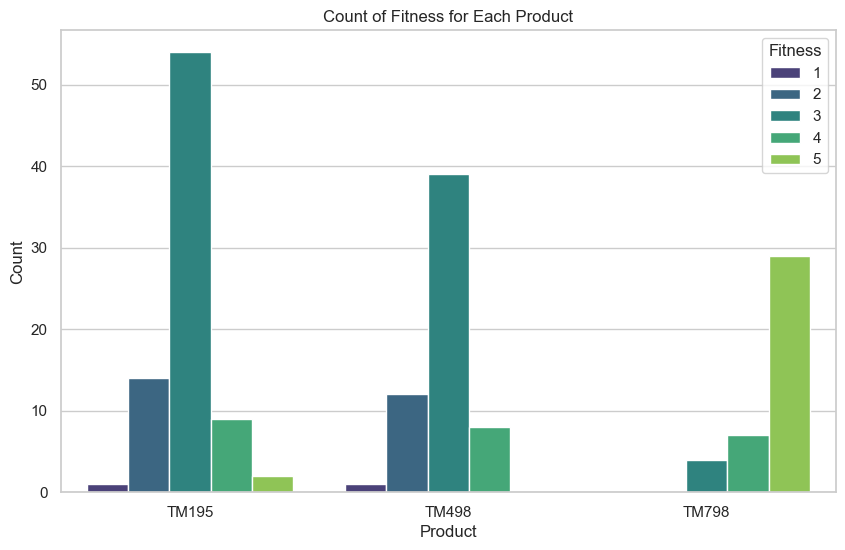

In [407]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Product', hue='Fitness',data=data, palette='viridis')

# Set labels and title
plt.xlabel('Product')
plt.ylabel('Count')
plt.title('Count of Fitness for Each Product')

# Show the plot
plt.show()

* TM195 is most popular among individuals with a moderate fitness level (3).
* TM498 is also most popular among individuals with a moderate fitness level (3).
* TM798 is most popular among individuals with a high fitness level (5).

### Grouping data w.r.t to products to build customer profiles

In [471]:
data.groupby('Product').mean()['Age']

Product
TM195    28.55
TM498    28.90
TM798    29.10
Name: Age, dtype: float64

In [472]:
data.groupby('Product').mean()['Education']

Product
TM195    15.037500
TM498    15.116667
TM798    17.325000
Name: Education, dtype: float64

In [345]:
data.groupby('Product').mean()['Income']

Product
TM195    46418.025
TM498    48973.650
TM798    75441.575
Name: Income, dtype: float64

In [346]:
data.groupby('Product').mean()['Usage']

Product
TM195    3.087500
TM498    3.066667
TM798    4.775000
Name: Usage, dtype: float64

In [347]:
data['Fitness'] = data['Fitness'].astype('int')

In [348]:
data.groupby('Product').mean()['Fitness']

Product
TM195    2.9625
TM498    2.9000
TM798    4.6250
Name: Fitness, dtype: float64

<h3>TM195 Customer:</h3>

* User Demographics:

Typically falls within the early 20s to early 30s age range.
Holds an educational background spanning 12-18 years.
Maintains an income range of 40K to 50K.

* Usage Patterns:

Plans a treadmill routine 3 to 4 times weekly.
Prefers light usage intensity.

* Fitness Perception:

Self-rated fitness level tends to be average, around 3 out of 5.

* Market Presence:

Represents a substantial portion of regular customers.

<h3>TM498 Customer:</h3>

* Customer Profile:

Primarily adults in their mid-20s to early 30s.
Educational background spanning 12-18 years.
Steadily earns around 50K.

* Treadmill Usage:

Plans a 3-day per week treadmill routine.
Envisions light to moderate usage.

* Adaptability to Schedule:

Displays flexibility in usage, possibly due to a busy or fixed schedule.

* Fitness Evaluation:

Self-identifies with an average fitness level.

<h3>TM798 Customer:</h3>

* Preferred Demographics:

Predominantly attracts males in their late 20s.
Tends to have a higher level of education.
Consists of higher income earners.

* Treadmill Utilization:

Plans a 4-5 day per week treadmill routine, targeting an average of 160 miles.

* Fitness Enthusiasm:

Self-perceived as very fit.

* Distinct Market Segment:

Represents a niche market segment, potentially fitness-focused.

## Usage vs Gender vs Marital Status

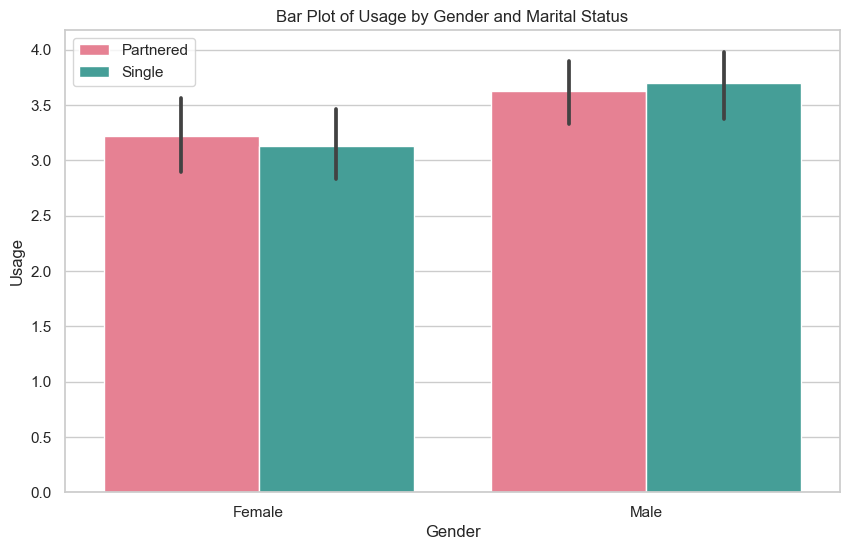

In [349]:
# Set the overall style
sns.set(style="whitegrid")  

# figure size
plt.figure(figsize=(10, 6)) 

# Bar plot
sns.barplot(x=data['Gender'], y=data['Usage'], hue=data['MaritalStatus'], palette='husl')

# Set plot labels and title
plt.xlabel('Gender')
plt.ylabel('Usage')
plt.title('Bar Plot of Usage by Gender and Marital Status')

# Display the legend in the upper left corner
plt.legend(loc='upper left')
# show the plot
plt.show()

* The graph shows the usage of a product or service by gender and marital status.
* For both genders, the usage is higher for partnered individuals than for single individuals.
* The usage is slightly higher for males than for females, but the difference is not very large.
* The error bars indicate that there is some variability in the data, which means that the results are not very precise.

## Gender vs Income

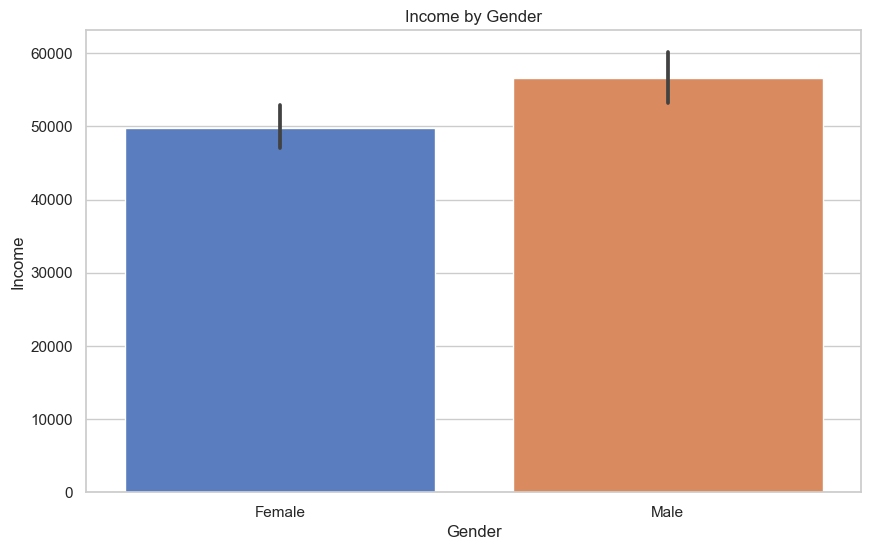

In [372]:
# Set the overall style
sns.set(style="whitegrid")  

# figure size
plt.figure(figsize=(10, 6))  

# Bar plot
sns.barplot(x=data['Gender'], y=data['Income'],palette='muted')

# Set plot labels and title
plt.xlabel('Gender')
plt.ylabel('Income')
plt.title('Income by Gender')

# show the plot
plt.show()

* The average income for males is higher than that for females.
* The difference in income between males and females is not very large, but it is statistically significant.

## Gender vs Income vs Marital Status

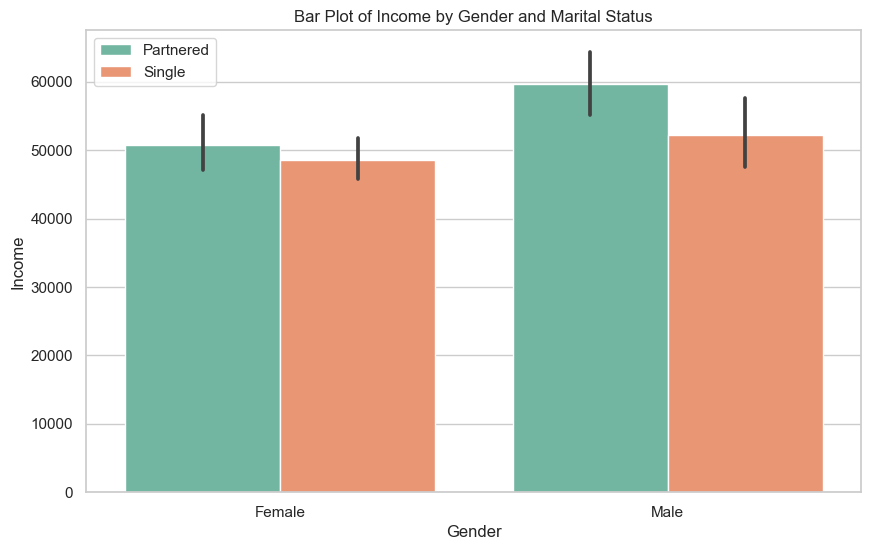

In [371]:
# Set the overall style
sns.set(style="whitegrid") 

# figure size
plt.figure(figsize=(10, 6))  

# Bar plot
sns.barplot(x=data['Gender'], y=data['Income'], hue=data['MaritalStatus'], palette='Set2')

# Set plot labels and title
plt.xlabel('Gender')
plt.ylabel('Income')
plt.title('Bar Plot of Income by Gender and Marital Status')

# Display the legend in the upper left corner
plt.legend(loc='upper left')
# show the plot
plt.show()

* Partnered individuals, both male and female, have higher incomes than their single counterparts.
* The income gap between partnered and single individuals is larger for males than for females.
* The income gap between males and females is smaller for partnered individuals than for single individuals.

## Gender vs Miles

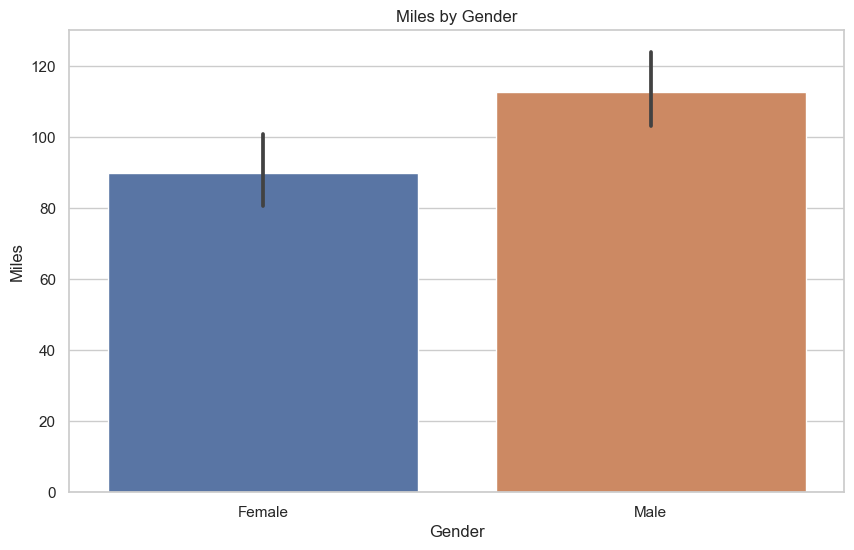

In [353]:
# figure size
plt.figure(figsize=(10, 6))  

# Create a barplot
sns.barplot(x=data['Gender'], y=data['Miles'])

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Miles')
plt.title('Miles by Gender')

# Show the plot
plt.show()

* The average miles run by males is slightly higher than that by females, but the difference is not very large.

## Gender vs Miles vs Marital Status

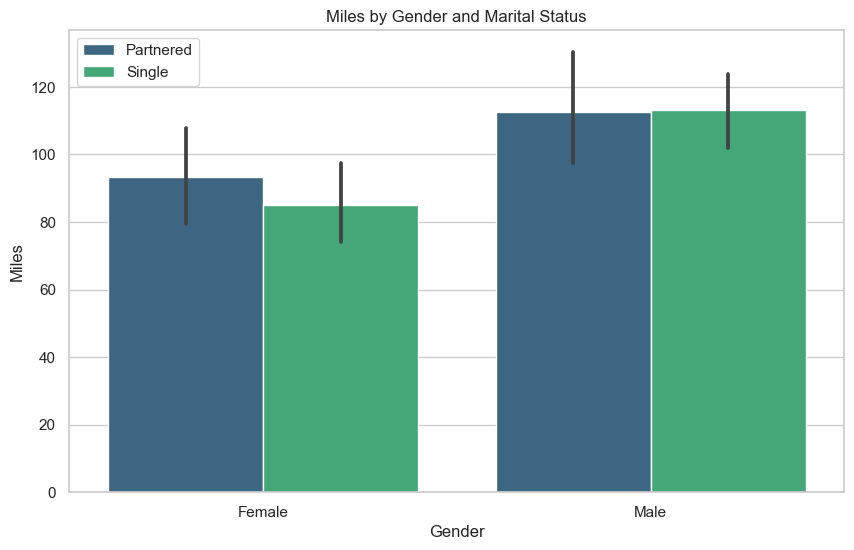

In [356]:
# figure size
plt.figure(figsize=(10, 6)) 

# Create a barplot with hue
sns.barplot(x=data['Gender'], y=data['Miles'], hue=data['MaritalStatus'],palette='viridis')

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Miles')
plt.title('Miles by Gender and Marital Status')

# Show the legend in the upper left corner
plt.legend(loc='upper left')

# Show the plot
plt.show()

* For females, the average miles run by partnered individuals is higher than that by single individuals.
* For males, the average miles run by single individuals is higher than that by partnered individuals.

## Gender vs Miles vs Education

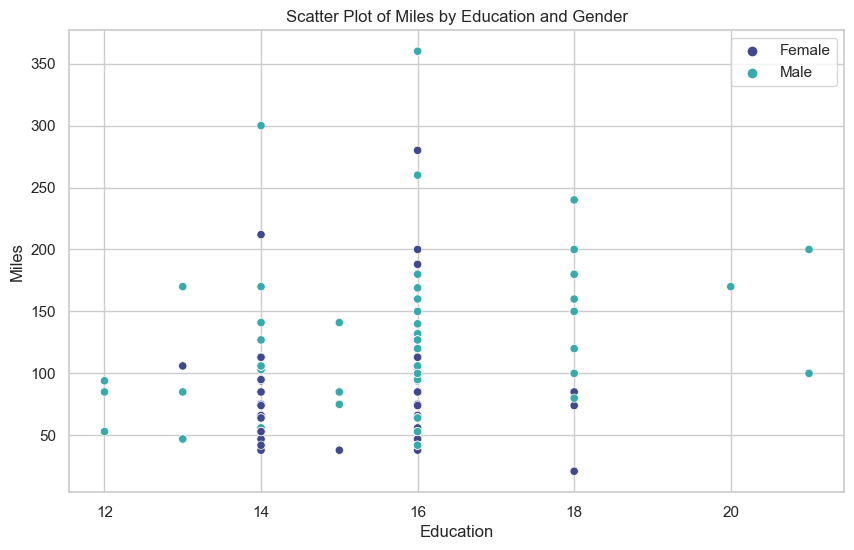

In [358]:
# figure size
plt.figure(figsize=(10, 6)) 

# Create a scatter plot with a pleasing color palette
sns.scatterplot(x=data['Education'], y=data['Miles'], hue=data['Gender'], palette='mako')

# Set labels and title
plt.xlabel('Education')
plt.ylabel('Miles')
plt.title('Scatter Plot of Miles by Education and Gender')

# Show the legend in the upper right corner
plt.legend(loc='upper right')

# Show the plot
plt.show()

* As the education level increases, both males and females tend to travel more miles, but there are exceptions.
* There is some overlap between the data points of males and females, which means that gender is not the only factor affecting miles traveled.

## Age vs Miles vs Gender

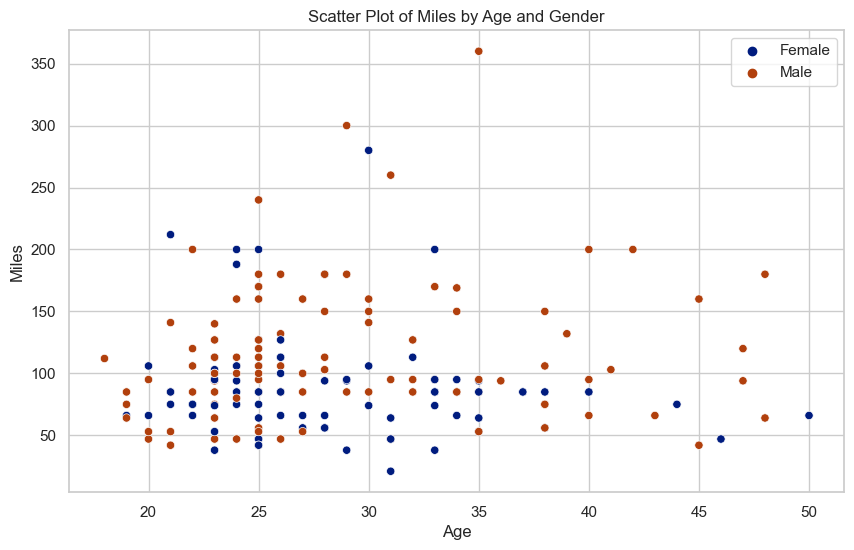

In [464]:
# Set the overall style
sns.set(style="whitegrid") 

# figure size
plt.figure(figsize=(10, 6))  

# Create a scatter plot with a pleasing color palette
sns.scatterplot(x=data['Age'], y=data['Miles'], hue=data['Gender'], palette='dark')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Miles')
plt.title('Scatter Plot of Miles by Age and Gender')

# Show the legend in the upper right corner
plt.legend(loc='upper right')

# Show the plot
plt.show()

* As the age increases, both males and females tend to travel more miles, but there are exceptions.

## Age vs Miles vs Marital Status

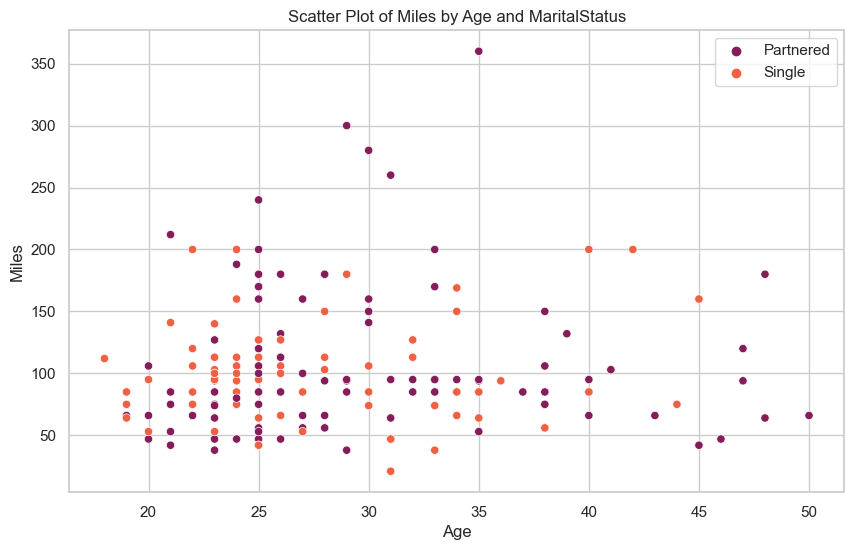

In [367]:
# figure size
plt.figure(figsize=(10, 6))  

# Create a scatter plot with a pleasing color palette
sns.scatterplot(x=data['Age'], y=data['Miles'], hue=data['MaritalStatus'], palette='rocket')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Miles')
plt.title('Scatter Plot of Miles by Age and MaritalStatus')

# Show the legend in the upper right corner
plt.legend(loc='upper right')

# Show the plot
plt.show()


* As the age increases, both single and partnered individuals tend to travel more miles, but there are exceptions.
* There is a higher concentration of partnered individuals who travel less than 150 miles compared to single individuals.
* There are fewer data points as age increases, indicating fewer observations or reduced running with increased age.

## Age vs Income vs Product

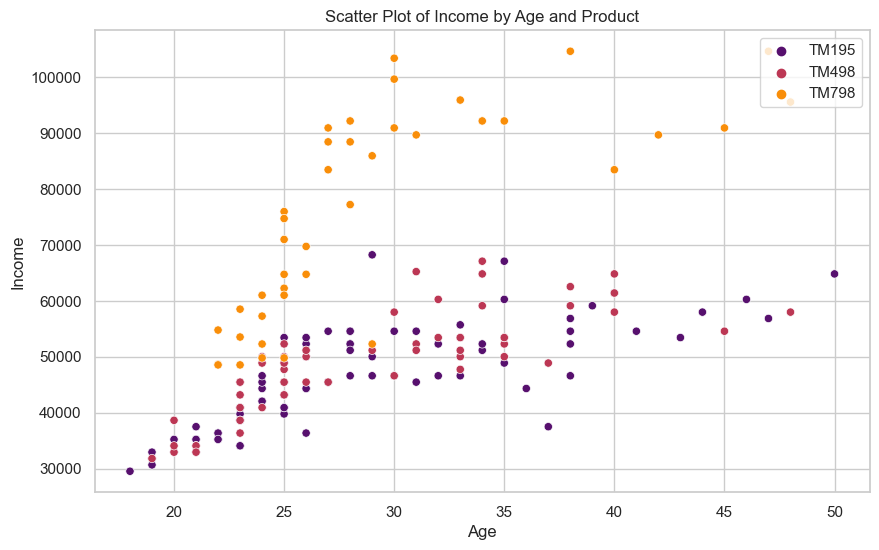

In [360]:
# figure size
plt.figure(figsize=(10, 6))  

# Create a scatter plot with a pleasing color palette
sns.scatterplot(x=data['Age'], y=data['Income'], hue=data['Product'], palette='inferno')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Scatter Plot of Income by Age and Product')

# Show the legend in the upper right corner
plt.legend(loc='upper right')

# Show the plot
plt.show()

* TM798 is generally purchased by higher-income individuals.
* TM195 and TM498 are more popular among mid to lower-income individuals.
* There is a wider age range of people with varying incomes purchasing TM195 and TM498, while higher-income earners who purchase TM798 are in a narrower age range.

## Income vs Miles vs Education

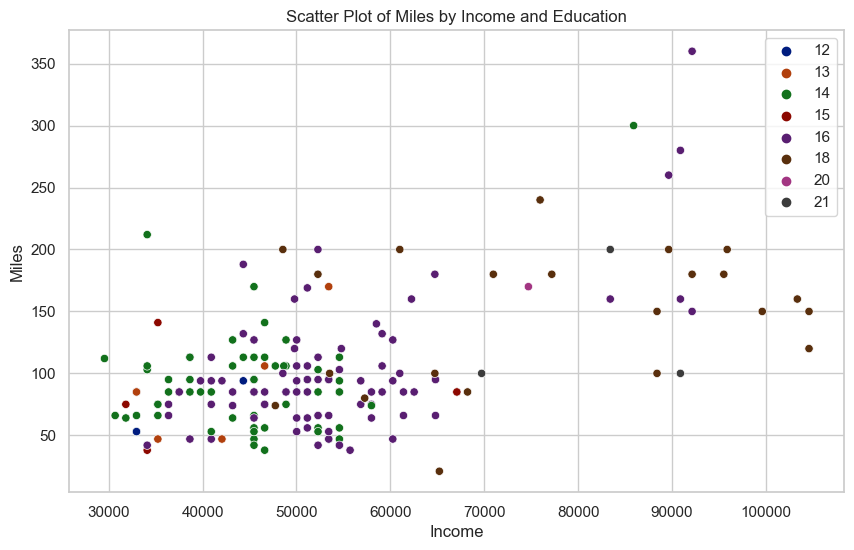

In [467]:
# figure size
plt.figure(figsize=(10, 6))  


# Create a scatter plot
sns.scatterplot(x=data['Income'], y=data['Miles'],hue=data['Education'], palette='dark')

# Set labels and title
plt.xlabel('Income')
plt.ylabel('Miles')
plt.title('Scatter Plot of Miles by Income and Education')

# Show the legend in the upper right corner
plt.legend(loc='upper right')

# Show the plot
plt.show()

* As the income increases, the number of miles tends to decrease.
* Customers having an income between 30K and 70K, have 12-16 years of education in which most of them are in 14 and 16 years, and all of this is within 50 to 200 miles.

## Income vs Miles vs Product

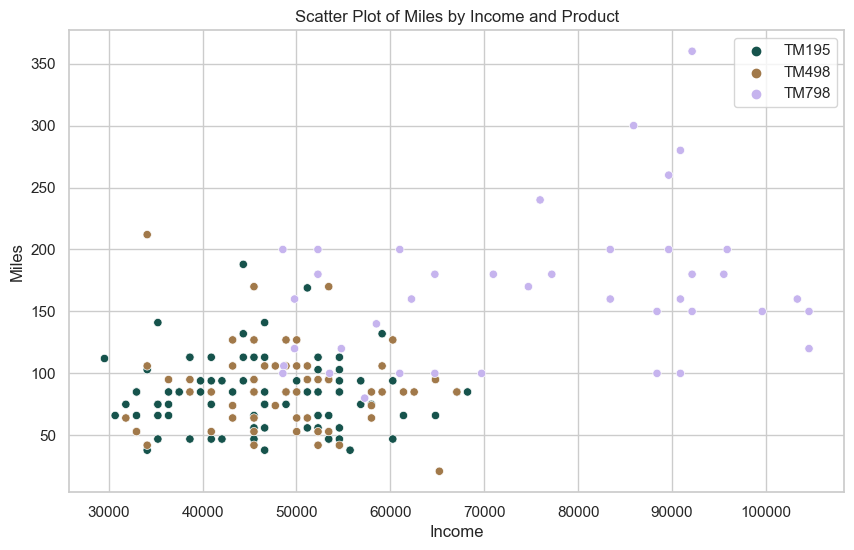

In [369]:
# figure size
plt.figure(figsize=(10, 6))

# Create a scatter plot
sns.scatterplot(x=data['Income'], y=data['Miles'], hue=data['Product'], palette='cubehelix')

# Set labels and title
plt.xlabel('Income')
plt.ylabel('Miles')
plt.title('Scatter Plot of Miles by Income and Product')

# Show the legend in the upper right corner
plt.legend(loc='upper right')

# Show the plot
plt.show()

* Customers having an income between 30K and 70K, run 50 to 200 miles and most of them have TM195 product.
* However, Customers who have salary more than 70K almost custoers purchased TM798 product, and those run more miles as compared to the customers who have less income.

## Conclusion

### Key insights

* TM195 was the most sold product with 44.4% popularty
* There were more male customers than female
* Partnered customers were more than single customers
* People with a fitness score of 3 were the most
* Maximum number of products were solding between 25 to 35 years of age
* 47.2% of customers have 16 years of education which shows most of the customers are educated at a college level
* Most number of products were sold among customers who use 3 to 4 times a week
* The income of the most customers range from 45k to 60k and a fewer 100k customers
* TM798 customers have a higher education, more income, more usage and more fitness.

### To conclude TM195 is a general model whereas TM798 is an advanced model which is more durable and in a competitive level. TM498 is a medium level product lying between these two.

### Business Recommendations

* Since there are more customers that have atleast minimum level of education, more marketing strategies can be made through social media to reach more such customers.

* The company should focus on getting more female customers either through a referral program from the partnered customers, since most of them should have a female family member/friend/colleague

* TM798 seems to be the high end model, the company should make sure the quality is maintained and push people from choosing TM498 to TM798 since they have decided to spend on an advanced model already

* The customers are mostly moderately fit who are trying to improve their fitness, looking at this pattern similar type of customers can be targeted

* The major age group that contributes in from 25 to 35. More marketing strategies can be made to attract 20-25 and 35-40 age groups since they fall under a similar generation.

* TM498 performs average in all aspects, some additional features to the model can improve sales.

* An offer program for customers that are single to refer a person with a partner which can spread the word to a larger group.